In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import struct

import nelpy as nel
import nelpy.io
import nelpy.plotting as npl

# assume default aesthetics
npl.setup()

%matplotlib inline

import sys
sys.path.append("D:/ryanh/github/ripple_analyses")
from functions import *

import pandas as pd

D:\ryanh\Anaconda3\envs\replay\lib\site-packages\nelpy\plotting\decoding.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


In [108]:
project_path = 'F:/Projects/PAE_PlaceCell/analysis/'
data_path = 'F:/Projects/PAE_PlaceCell/ProcessedData/'
spike_path = 'F:/Projects/PAE_PlaceCell/analysis/spikes/'
df_cell_class = pd.read_csv(project_path+'cell_recruitment/processed/pyr_int_df.csv')
# df_swr = pd.read_csv(project_path+'swr_data/post_processed/swr_df.csv')
df_swr = pd.read_csv(r'F:\Projects\PAE_PlaceCell\analysis\multiunit_data\post_processed\mua_df.csv')

In [136]:
session = pd.unique(df_swr.session)[0]

session = 'LS19_S20170522113749'

In [322]:
# get data session path from mat file
path = get_session_path(os.path.join(data_path,session)+'.mat')

# load position data from .mat file
df = load_position(os.path.join(data_path,session)+'.mat')

# load spikes
spikes = np.load(os.path.join(spike_path,session)+'.npy',allow_pickle=True)

In [323]:
f = h5py.File(os.path.join(data_path,session)+'.mat','r')
ex_ep = []
for i in range(f['events'].shape[0]):
    ex_ep.append(f['events'][i])

session_epochs = nel.EpochArray(ex_ep)
session_epochs

<EpochArray at 0x1b6ae293430: 3 epochs> of length 1:06:39:156 hours

In [139]:
for ep in session_epochs:
    print(ep.duration)

16:00:678 minutes
26:30:639 minutes
24:07:839 minutes


In [140]:
session_epochs[0]

<EpochArray at 0x1b68f5fad90: 1 epoch> of length 16:00:678 minutes

In [324]:
pos = nel.AnalogSignalArray(timestamps=df.ts,
                            data=[df.x, df.y],
                            fs=30,
                            support=(session_epochs[0]))


D:\ryanh\Anaconda3\envs\replay\lib\site-packages\nelpy\core\_analogsignalarray.py:861: UserWarning: ignoring signal outside of support


In [142]:
pos

<AnalogSignalArray at 0x1b68f596a60: 2 signals> for a total of 16:00:678 minutes

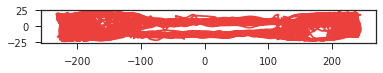

In [325]:
#npl.plot2d(pos) # plot the entire trajectory
plt.plot(pos.ydata[0,:],pos.ydata[1,:])
ax = plt.gca()
ax.set_aspect('equal')

In [326]:
x = pos.ydata[0,:]

# x = ((x - min(x)) / (max(x) - min(x))) * (120-0) + 0
pos1d = nel.AnalogSignalArray(x, timestamps=pos.time, support=pos.support, fs=30)

In [327]:
print('pos:  ', pos)
print('pos1d:', pos1d)

pos:   <AnalogSignalArray at 0x1b6ae293a30: 2 signals> for a total of 16:00:678 minutes
pos1d: <AnalogSignalArray at 0x1b6ae144820: 1 signals> for a total of 16:00:678 minutes


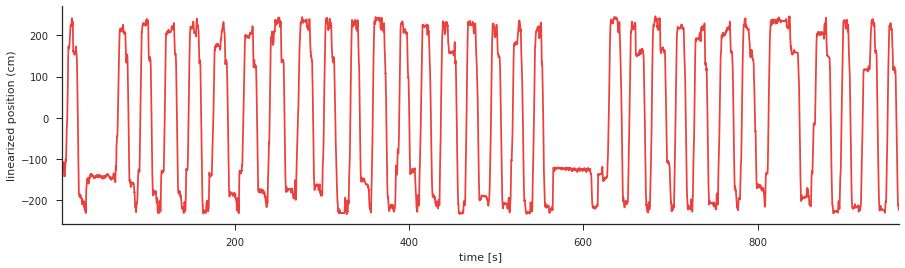

In [328]:
fig = plt.figure(figsize=(15,4))
npl.plot(pos1d)
ax = plt.gca()
ax.set_xlabel('time [s]')
ax.set_ylabel('linearized position (cm)')
npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

In [329]:
import itertools
spikes_ = list(itertools.chain(*spikes))
# session_range = [min(spikes_),max(spikes_)]

session_bounds = nel.EpochArray([min(spikes_),max(spikes_)])

st = nel.SpikeTrainArray(timestamps=spikes,support=session_bounds, fs=32000)
print(st)

D:\ryanh\Anaconda3\envs\replay\lib\site-packages\nelpy\core\_eventarray.py:709: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
D:\ryanh\Anaconda3\envs\replay\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


<SpikeTrainArray at 0x1b6ae3d5d00: 64 units> at 32000 Hz


In [148]:
st.n_spikes

array([ 4139,  6574,  5046,  8824,  7319,  3928, 28991,  4309,  1556,
        8609,  6150, 31732,  5798,  5496,  5883,  5725,  5644,   938,
       11767,  7702,  1197, 15471,  3195,  1680,  8129,  2024,  4283,
        4001, 37801, 29195,  5818, 26969, 27057, 11407, 30609, 15671,
        3678,  5536, 16611, 31449,  1972,  9037, 27923,  2527, 19425,
       21386,  5615, 43903,  5979, 18169,  1963,  2541,  3930,  4055,
        2772,   668,  5713,  6471,  2776,  9055, 28577,  4348,  2450,
       20753])

In [149]:
avg_firing_rates = st.n_spikes / st.support.duration

print(avg_firing_rates)

[0.85673749 1.3607616  1.04447871 1.8264923  1.51497021 0.8130623
 6.00088828 0.89192603 0.32207865 1.78198914 1.27299724 6.56825177
 1.20013626 1.13762485 1.21773053 1.18502588 1.16825958 0.19415795
 2.43566805 1.59424792 0.24776873 3.20236427 0.66133759 0.34774559
 1.68263326 0.41895064 0.88654426 0.82817267 7.8244827  6.04311453
 1.20427609 5.58235163 5.60056687 2.36115114 6.3358004  3.24376256
 0.76131445 1.14590451 3.43833449 6.5096732  0.40818708 1.87058147
 5.77982145 0.52306732 4.02080835 4.42671853 1.16225683 9.08754435
 1.23760171 3.76082713 0.40632416 0.5259652  0.81347628 0.83935021
 0.57378022 0.13827027 1.18254199 1.33944148 0.57460818 1.87430732
 5.91519383 0.8999987  0.50712898 4.29569296]


(0.004429, 4831.122529)

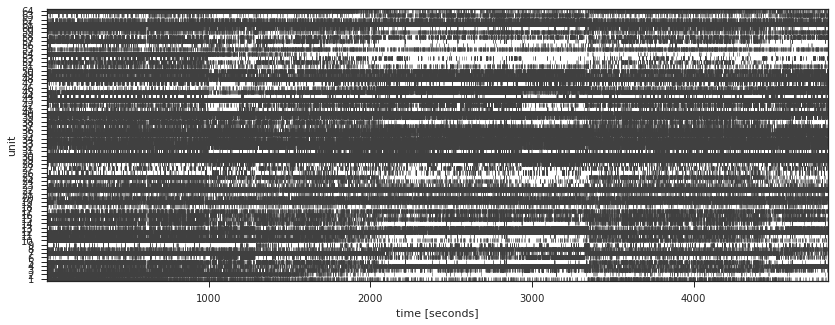

In [150]:
fig, ax = plt.subplots(ncols=1, figsize=(14,5))

# use nelpy to plot the spike raster
npl.rasterplot(st, lw=0.5, ax=ax)
ax.set_xlabel('time [seconds]')
ax.set_ylabel('unit')
ax.set_xlim(*session_bounds.time)

In [ ]:
# axc, axr = npl.rastercountplot(st, lw=0.5, nbins=130)
# axes = (axr, axc)
# axr.set_xlabel('time [seconds]')
# axr.set_ylabel('unit')
# axr.set_xlim(*session_bounds.time)

In [330]:
sigma_100ms = 0.1

# compute and smooth speed of linearized position
speed1 = nel.utils.ddt_asa(pos1d, smooth=True, sigma=sigma_100ms, norm=True)

# find epochs where the animal ran at least as fast as v1=8 percent per second
run_epochs = nel.utils.get_run_epochs(speed1, v1=3, v2=3)

In [331]:
print(run_epochs)

<EpochArray at 0x1b6ae3d5b20: 261 epochs> of length 14:07:499 minutes


In [332]:
avg_firing_rates_during_run = st[run_epochs].n_spikes / st[run_epochs].support.duration 

for unit, (run_rate, avg_rate) in enumerate(zip(avg_firing_rates_during_run, avg_firing_rates)):
    print('unit {}: {:2.3f} Hz (run and rest: {:2.3f} Hz)'.format(unit+1, run_rate, avg_rate))

unit 1: 2.230 Hz (run and rest: 0.857 Hz)
unit 2: 4.801 Hz (run and rest: 1.361 Hz)
unit 3: 1.746 Hz (run and rest: 1.044 Hz)
unit 4: 1.121 Hz (run and rest: 1.826 Hz)
unit 5: 3.760 Hz (run and rest: 1.515 Hz)
unit 6: 0.222 Hz (run and rest: 0.813 Hz)
unit 7: 12.942 Hz (run and rest: 6.001 Hz)
unit 8: 0.678 Hz (run and rest: 0.892 Hz)
unit 9: 0.159 Hz (run and rest: 0.322 Hz)
unit 10: 5.785 Hz (run and rest: 1.782 Hz)
unit 11: 3.179 Hz (run and rest: 1.273 Hz)
unit 12: 5.900 Hz (run and rest: 6.568 Hz)
unit 13: 0.571 Hz (run and rest: 1.200 Hz)
unit 14: 2.812 Hz (run and rest: 1.138 Hz)
unit 15: 1.171 Hz (run and rest: 1.218 Hz)
unit 16: 2.545 Hz (run and rest: 1.185 Hz)
unit 17: 1.163 Hz (run and rest: 1.168 Hz)
unit 18: 0.243 Hz (run and rest: 0.194 Hz)
unit 19: 2.166 Hz (run and rest: 2.436 Hz)
unit 20: 1.273 Hz (run and rest: 1.594 Hz)
unit 21: 0.287 Hz (run and rest: 0.248 Hz)
unit 22: 3.221 Hz (run and rest: 3.202 Hz)
unit 23: 1.437 Hz (run and rest: 0.661 Hz)
unit 24: 0.401 Hz (

D:\ryanh\Anaconda3\envs\replay\lib\site-packages\nelpy\core\_analogsignalarray.py:861: UserWarning: ignoring signal outside of support
D:\ryanh\Anaconda3\envs\replay\lib\site-packages\nelpy\core\_analogsignalarray.py:861: UserWarning: ignoring signal outside of support


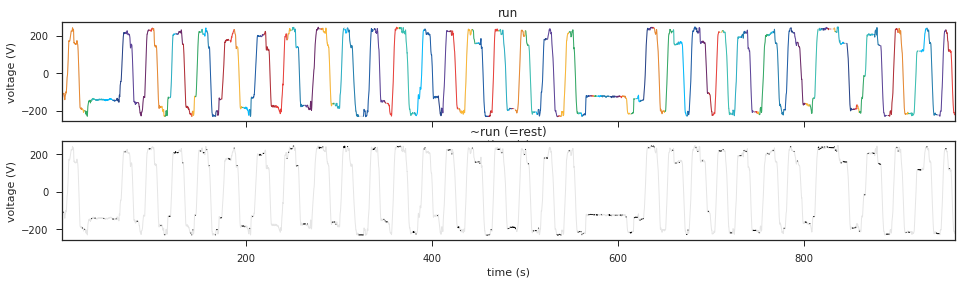

In [333]:
with npl.FigureManager(show=True, nrows=2, figsize=(16,4)) as (fig, axes):
    npl.utils.skip_if_no_output(fig)
    ax0, ax1 = axes
    for ax in axes:
        ax.plot(pos1d.time, pos1d.asarray().yvals, lw=1, alpha=0.2, color='gray')
        ax.set_ylabel('position (%)')
    
    npl.plot(pos1d[run_epochs], ax=ax0, lw=1, label='run')
    npl.plot(pos1d[~run_epochs], ax=ax1, lw=1, label='run', color='k')
    
    npl.utils.no_xticklabels(ax0)
    
    ax0.set_title('run')
    ax1.set_title('~run (=rest)')

In [155]:
st_run = st[run_epochs] # restrict spike trains to those epochs during which the animal was running


In [156]:
ds_run = 0.5 # 100 ms
ds_50ms = 0.05

# smooth and re-bin:
sigma = 0.3 # 300 ms spike smoothing
bst_run = st_run.bin(ds=ds_50ms).smooth(sigma=sigma, inplace=True).rebin(w=ds_run/ds_50ms)

D:\ryanh\Anaconda3\envs\replay\lib\site-packages\nelpy\core\_eventarray.py:1765: UserWarning: interval duration is less than bin size: ignoring...


In [175]:
sigma = 0.2 # smoothing std dev in cm
tc = nel.TuningCurve1D(bst=bst_run, extern=pos1d, n_extern=50, extmin=0, extmax=120, sigma=sigma, min_duration=1)

D:\ryanh\Anaconda3\envs\replay\lib\site-packages\nelpy\core\_eventarray.py:478: UserWarning: series tags have not yet been specified


In [176]:
tc = tc.reorder_units()


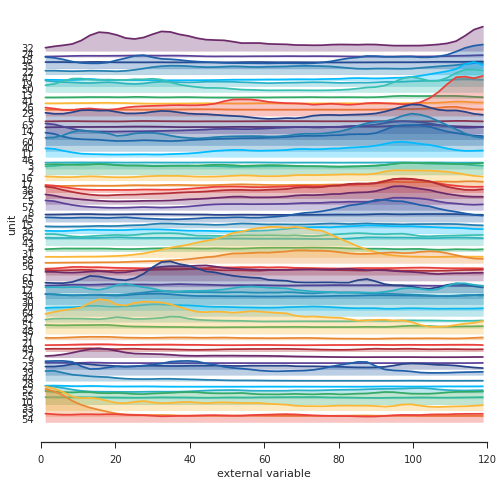

In [168]:
npl.set_palette(npl.colors.rainbow)
with npl.FigureManager(show=True, figsize=(8,8)) as (fig, ax):
    npl.utils.skip_if_no_output(fig)
    npl.plot_tuning_curves1D(tc.smooth(sigma=2), normalize=False, pad=3)

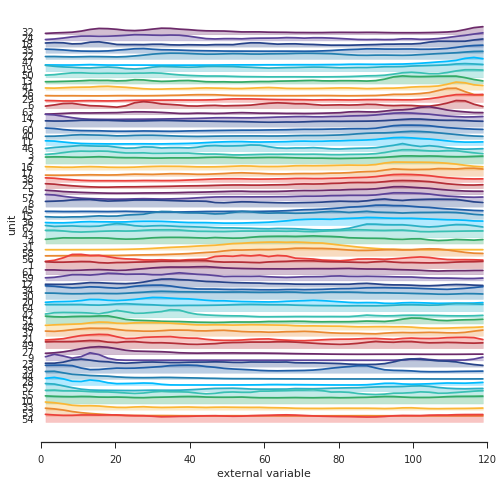

In [169]:
npl.set_palette(npl.colors.rainbow)
with npl.FigureManager(show=True, figsize=(8,8)) as (fig, ax):
    npl.utils.skip_if_no_output(fig)
    npl.plot_tuning_curves1D(tc.smooth(sigma=2), normalize=True, pad=0.8)

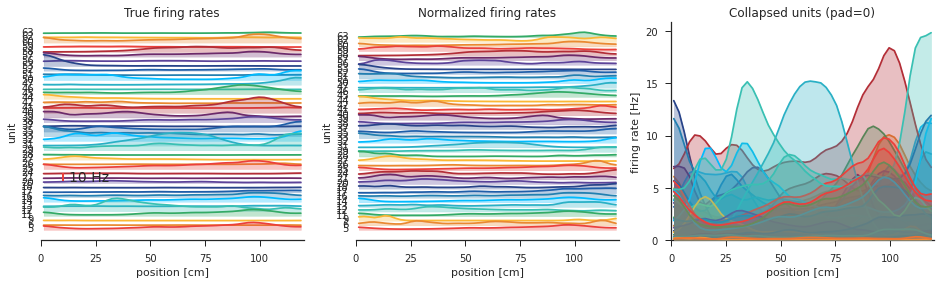

In [177]:
# set criteria for units used in decoding
# min_peakfiringrate = 1 # Hz
# max_avgfiringrate = 5 # Hz
# peak_to_mean_ratio_threshold = 3.5 # peak firing rate should be greater than 3.5 times mean firing rate

min_peakfiringrate = .25 # Hz
max_avgfiringrate = 15 # Hz
peak_to_mean_ratio_threshold = 2

# unimodal_cells = find_unimodal_tuningcurves1D(smoothed_rate, peakthresh=0.5)

# enforce minimum peak firing rate
unit_ids_to_keep = set(np.asanyarray(tc.unit_ids)[np.argwhere(tc.ratemap.max(axis=1)>min_peakfiringrate).squeeze().tolist()])
# enforce maximum average firing rate
unit_ids_to_keep = unit_ids_to_keep.intersection(set( np.asanyarray(tc.unit_ids)[np.argwhere(tc.ratemap.mean(axis=1)<max_avgfiringrate).squeeze().tolist()]   ))

# enforce peak to mean firing ratio
peak_firing_rates = tc.max(axis=1)
mean_firing_rates = tc.mean(axis=1)
ratio = peak_firing_rates/mean_firing_rates
unit_ids_to_keep = unit_ids_to_keep.intersection(set(np.asanyarray(tc.unit_ids)[np.argwhere(ratio>=peak_to_mean_ratio_threshold).squeeze().tolist()]))


# finally, convert remaining units into a list of indices
unit_ids_to_keep = list(unit_ids_to_keep)

# modify spike trains and ratemap to only include those units that passed all the criteria
sta_placecells = st._unit_subset(unit_ids_to_keep)

tc = tc._unit_subset(unit_ids_to_keep)

# reorder cells by peak firing location on track (this is nice for visualization, but doesn't affect decoding)
# tc.reorder_units(inplace=True)

# with plt.xkcd():
with npl.palettes.color_palette(npl.colors.rainbow):
    with npl.FigureManager(show=True, nrows=1, ncols=3, figsize=(16,4)) as (fig, axes):
        npl.utils.skip_if_no_output(fig)
        ax0, ax1, ax2 = axes

        npl.plot_tuning_curves1D(tc.smooth(sigma=3), ax=ax0, pad=5.5);
        npl.plot_tuning_curves1D(tc.smooth(sigma=3), ax=ax1, normalize=True, pad=0.9);
        npl.plot_tuning_curves1D(tc.smooth(sigma=3), ax=ax2, pad=0);

        for ax in axes:
            ax.set_xlabel('position [cm]')
        npl.utils.xticks_interval(25, *axes)
        npl.utils.yticks_interval(5, ax2)
        npl.add_simple_scalebar("10 Hz", ax=ax0, xy=(10, 57), length=10, orientation='v', rotation_text='h', size=14)
#         npl.add_simple_scalebar("5 Hz", ax=ax1, xy=(10, 17.5), length=5, orientation='v', rotation_text='h', size=14)
        ax0.set_title('True firing rates', size=12)
        ax1.set_title('Normalized firing rates', size=12)
        ax2.set_title('Collapsed units (pad=0)', size=12)

D:\ryanh\Anaconda3\envs\replay\lib\site-packages\nelpy\core\_eventarray.py:1765: UserWarning: interval duration is less than bin size: ignoring...
D:\ryanh\Anaconda3\envs\replay\lib\site-packages\nelpy\core\_eventarray.py:1590: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
D:\ryanh\Anaconda3\envs\replay\lib\site-packages\nelpy\core\_eventarray.py:478: UserWarning: series tags have not yet been specified
D:\ryanh\Anaconda3\envs\replay\lib\site-packages\nelpy\core\_eventarray.py:1590: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
D:\ryanh\Anaco

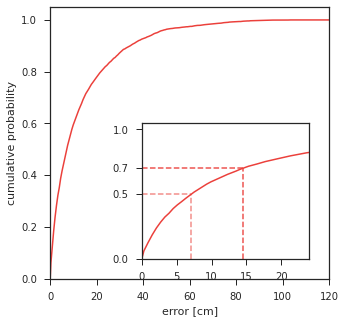

In [178]:

with npl.FigureManager(show=True, figsize=(5,5)) as (fig, ax):
    npl.utils.skip_if_no_output(fig)
    
    ds_run = 0.125 # 100 ms
    ds_50ms = 0.05
#     st_run = st[run_epochs]

    # smooth and re-bin:
    bst_run = st_run.bin(ds=ds_50ms).smooth(sigma=0.15, inplace=True).rebin(w=ds_run/ds_50ms)
    
    bst = bst_run

    npl.plot_cum_error_dist(bst=bst, extern=pos1d, extmin=0, extmax=120, sigma=0.)

<AxesSubplot:xlabel='external variable', ylabel='unit'>

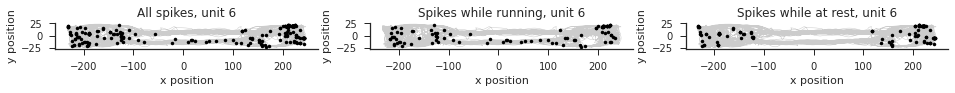

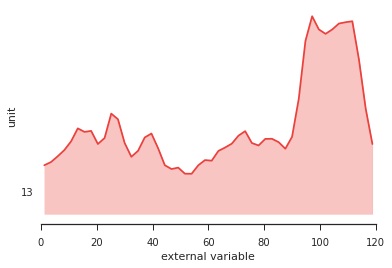

In [179]:

fig, axes = plt.subplots(ncols=3, figsize=(16,4))

ax0, ax1, ax2 = axes

# plot trajectory in gray
for ax in axes:
    npl.plot2d(pos, lw=0.5, c='0.8', ax=ax)
    ax.set_aspect('equal')  
    ax.set_xlabel('x position')
    ax.set_ylabel('y position')
    npl.utils.clear_right(ax)
    npl.utils.clear_top(ax)

unit_id = 6

# all spikes
at = st.loc[:,unit_id][pos.support].time
_, pos_at_spikes = pos.asarray(at=at)
ax0.plot(pos_at_spikes[0,:], pos_at_spikes[1,:], '.', color='k')
ax0.set_aspect('equal')
ax0.set_title('All spikes, unit {}'.format(unit_id))

# spikes during RUN
at = st.loc[:,unit_id][run_epochs].time
_, pos_at_spikes = pos.asarray(at=at)
ax1.plot(pos_at_spikes[0,:], pos_at_spikes[1,:], '.', color='k')
ax1.set_aspect('equal')
ax1.set_title('Spikes while running, unit {}'.format(unit_id))

# spikes during REST
at = st.loc[:,unit_id][~run_epochs].time
_, pos_at_spikes = pos.asarray(at=at)
ax2.plot(pos_at_spikes[0,:], pos_at_spikes[1,:], '.', color='k')
ax2.set_aspect('equal')
ax2.set_title('Spikes while at rest, unit {}'.format(unit_id))

plt.figure()
npl.plot_tuning_curves1D(tc[unit_id-1].smooth(sigma=2), normalize=False)

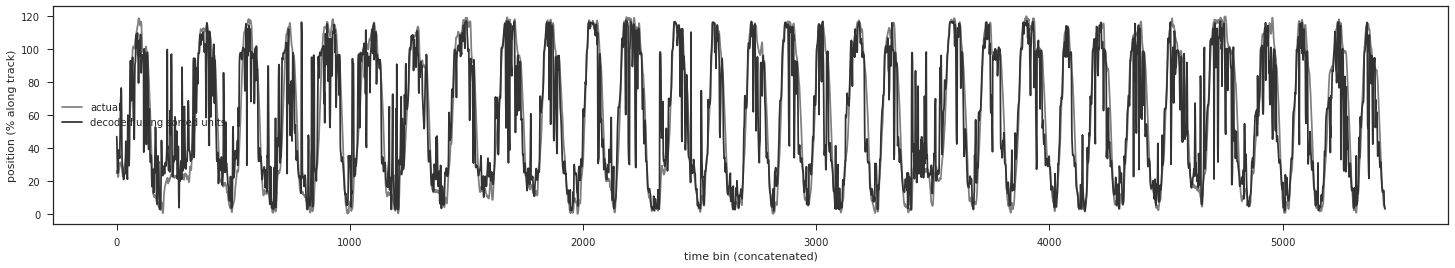

In [180]:
plt.figure(figsize=(25,4))

posteriors, lengths, mode_pth, mean_pth = nel.decoding.decode1D(bst_run.loc[:,unit_ids_to_keep], tc)
actual_pos = pos1d(bst_run.bin_centers)
plt.plot(actual_pos, c='grey', label='actual')
plt.ylabel('position (% along track)')
plt.xlabel('time bin (concatenated)')
plt.plot(mean_pth, c='0.2', label='decoded using sorted units')
plt.legend()
plt.show()

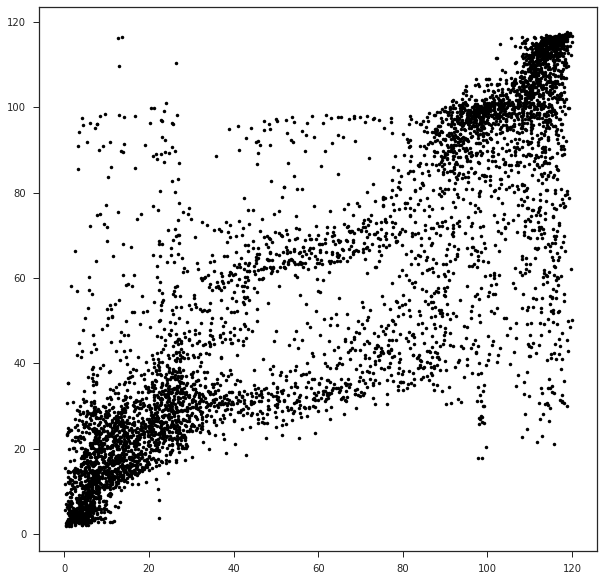

In [181]:
plt.figure(figsize=(10,10))
plt.plot(actual_pos,mean_pth,'.k')

In [182]:
# finally, convert remaining units into a list of indices
place_cell_unit_ids = list(unit_ids_to_keep)
non_place_cells = list(set(st.unit_ids) - set(place_cell_unit_ids))

# modify spike trains and ratemap to only include those units that passed all the criteria
tc_placecells = tc._unit_subset(place_cell_unit_ids)

place_cell_order = tc_placecells.get_peak_firing_order_ids()

new_unit_order = np.hstack((np.array(non_place_cells), np.array(place_cell_order)))
st.reorder_units_by_ids(new_unit_order, inplace=True)

sta_placecells = st._unit_subset(place_cell_unit_ids)

In [226]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_all_PBEs(bst, spiketrainarray, tuningcurve, tc_placecells, idx=None, title_str=None):
    if idx is not None:
        bst = bst[idx]
    st = spiketrainarray
    tc = tuningcurve
    tc_placecells = tc_placecells

    no = tc_placecells.get_peak_firing_order_ids()
    st.reorder_units_by_ids(no, inplace=True)

    st_cut = st[bst.support]
    st_cut._support = bst.support # hacky fix so that we can plot events out of order
    st_cut = nel.utils.collapse_time(st_cut)

    # decode neural activity
    posterior, bdries, mode_pth, mean_pth = nel.decoding.decode1D(bst=bst, ratemap=tc, xmax=120)

    with npl.FigureManager(show=True, figsize=(0.2*bst.n_bins,4)) as (fig, ax):
        npl.utils.skip_if_no_output(fig)

        pixel_width = 0.5

        npl.imagesc(x=np.arange(bst.n_bins), y=np.arange(121), data=posterior, cmap=plt.cm.bone_r, ax=ax) #Spectral_r
#         npl.utils.yticks_interval(310)
        npl.utils.no_yticks(ax)
        # plt.imshow(posterior, cmap=plt.cm.Spectral_r, interpolation='none', aspect='auto')
        ax.vlines(np.arange(bst.lengths.sum())-pixel_width, *ax.get_ylim(), lw=1, linestyle=':', color='0.8')
        ax.vlines(np.cumsum(bst.lengths)-pixel_width, *ax.get_ylim(), lw=1)

        ax.set_xlim(-pixel_width, bst.lengths.sum()-pixel_width)

        event_centers = np.insert(np.cumsum(bst.lengths),0,0)
        event_centers = event_centers[:-1] + bst.lengths/2 - 0.5

        ax.set_xticks(event_centers);
        if idx is not None:
            ax.set_xticklabels(idx);
        else:
            ax.set_xticklabels(np.arange(bst.n_epochs));

        npl.utils.no_xticks(ax)
        ax.set_ylim(0,120)

        divider = make_axes_locatable(ax)
        axRaster = divider.append_axes("top", size=1, pad=0)

        npl.rasterplot(st_cut, vertstack=True, ax=axRaster, lh=1.25)
        axRaster.set_xlim(st_cut.support.time.squeeze())
        bin_edges = np.linspace(st_cut.support.time[0,0],st_cut.support.time[0,1], bst.n_bins+1)
    #     axRaster.vlines(bin_edges, *ax.get_ylim(), lw=1, linestyle=':', color='0.2')
        axRaster.vlines(bin_edges[np.cumsum(bst.lengths)], *ax.get_ylim(), lw=1, color='0.2')
        npl.utils.no_xticks(axRaster)
        npl.utils.no_xticklabels(axRaster)
        npl.utils.no_yticklabels(axRaster)
        npl.utils.no_yticks(axRaster)
        ax.set_ylabel('position [%]')
        ax.set_xlabel('time bins (20 ms)')
        if title_str:
            fig.suptitle(title_str)
        npl.utils.clear_left_right(axRaster)
        npl.utils.clear_top_bottom(axRaster)
    return fig


In [184]:
df_swr[df_swr.session == session]

,Unnamed: 0,start_time,end_time,peak_time,ripple_duration,area,session,ep_type,group,rat
58315,58315,15.8465,15.9145,15.8835,0.068,ca1,LS19_S20170522113749,track,pae,LS19
58316,58316,16.3935,16.6805,16.5905,0.287,ca1,LS19_S20170522113749,track,pae,LS19
58317,58317,21.5745,21.8285,21.7595,0.254,ca1,LS19_S20170522113749,track,pae,LS19
58318,58318,26.3505,26.4865,26.4345,0.136,ca1,LS19_S20170522113749,track,pae,LS19
58319,58319,31.7345,31.8605,31.8255,0.126,ca1,LS19_S20170522113749,track,pae,LS19
...,...,...,...,...,...,...,...,...,...,...
58932,58932,4510.1205,4510.3075,4510.2655,0.187,ca1,LS19_S20170522113749,cylinder_2,pae,LS19
58933,58933,4548.3795,4548.4515,4548.4135,0.072,ca1,LS19_S20170522113749,cylinder_2,pae,LS19
58934,58934,4650.4535,4650.5475,4650.4855,0.094,ca1,LS19_S20170522113749,cylinder_2,pae,LS19
58935,58935,4654.3395,4654.4725,4654.3985,0.133,ca1,LS19_S20170522113749,cylinder_2,pae,LS19


In [248]:
# PBEs = np.array([df_swr[df_swr.session == session].start_time,df_swr[df_swr.session == session].end_time])

PBEs = nel.EpochArray([np.array([df_swr[df_swr.session == session].start_time,df_swr[df_swr.session == session].end_time]).T])

bst_placecells = sta_placecells[PBEs].bin(ds=0.02)
# tc = nel.TuningCurve1D(bst=bst_placecells, extern=pos1d, n_extern=50, extmin=0, extmax=120, sigma=sigma, min_duration=1)


In [186]:
PBEs

<EpochArray at 0x1b682a166d0: 622 epochs> of length 1:35:597 minutes

D:\ryanh\Anaconda3\envs\replay\lib\site-packages\nelpy\core\_eventarray.py:1590: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
D:\ryanh\Anaconda3\envs\replay\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support
D:\ryanh\Anaconda3\envs\replay\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


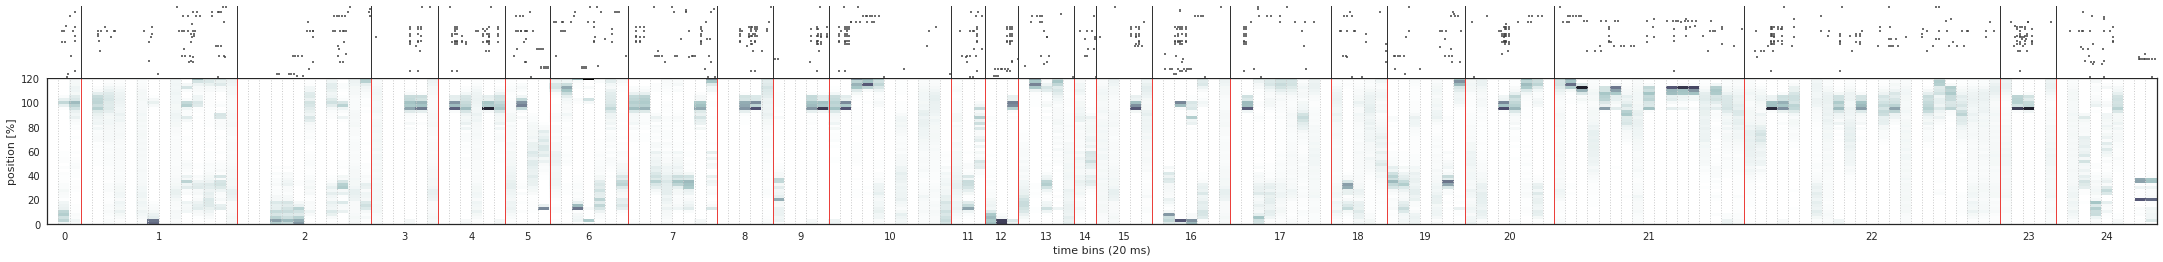

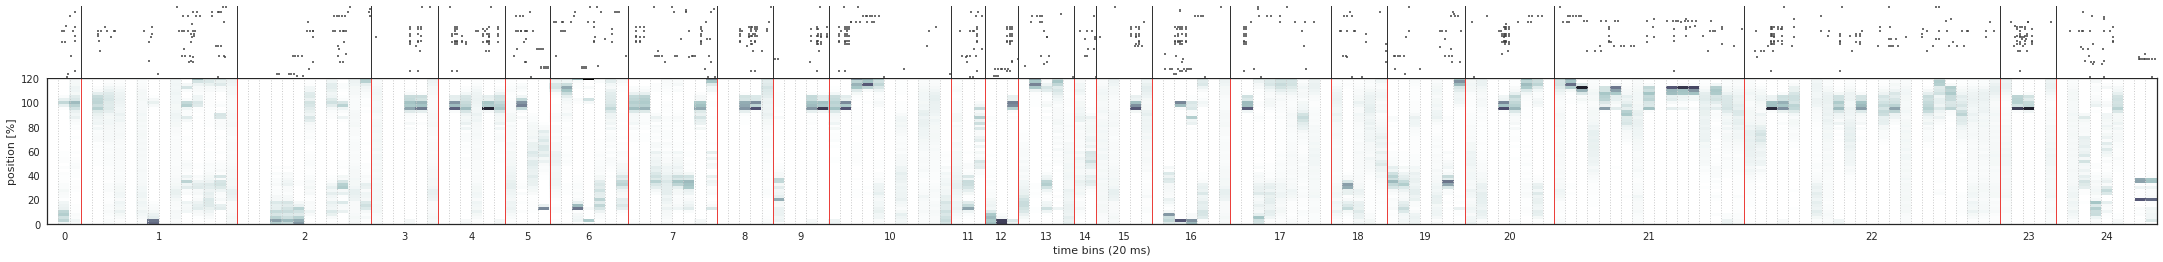

In [249]:
tc_placecells = tc._unit_subset(place_cell_unit_ids)

plot_all_PBEs(bst_placecells, sta_placecells, tc_placecells, tc_placecells,idx=np.arange(0,25))


D:\ryanh\Anaconda3\envs\replay\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


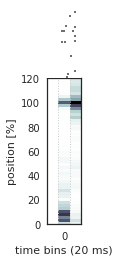

In [256]:
fig = plot_all_PBEs(bst_placecells[0], sta_placecells, tc_placecells, tc_placecells)
# plot_all_PBEs(bst_placecells[51], sta_placecells, tc_placecells, tc_placecells)


In [ ]:
from nelpy.analysis import replay
# scores_bayes, scores_bayes_shuffled, scores_bayes_percentile = replay.score_Davidson_final_bst_fast(bst_placecells, tc_placecells)


In [306]:
score, ri, ci= replay.get_line_of_best_Davidson_score(bst_placecells[22], tc_placecells, w=3, n_samples=50000)

D:\ryanh\Anaconda3\envs\replay\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered


In [319]:
# r2values, r2values_shuffled = replay.linregress_ting(bst_placecells[22], tc_placecells, n_shuffles=250)

slopes, intercepts, r2values = replay.linregress_bst(bst_placecells[22], tc_placecells)

In [321]:
print(slopes,intercepts,r2values)



[1.53807043] [72.80741821] [0.23012618]


In [189]:
def get_pvalue(obs,null):
    return (sum(abs(null) >= abs(obs)) + 1) / (len(null) + 1)

In [190]:
scores, scores_time_swap, scores_col_cycle = replay.trajectory_score_bst(bst_placecells, tc_placecells, n_shuffles=500)
# print(scores,scores_col_cycle )
# plt.hist(scores_col_cycle )

D:\ryanh\Anaconda3\envs\replay\lib\site-packages\scipy\stats\_stats_mstats_common.py:160: RuntimeWarning: invalid value encountered in double_scalars
D:\ryanh\Anaconda3\envs\replay\lib\site-packages\scipy\stats\_stats_mstats_common.py:174: RuntimeWarning: invalid value encountered in sqrt
D:\ryanh\Anaconda3\envs\replay\lib\site-packages\scipy\stats\_stats_mstats_common.py:176: RuntimeWarning: invalid value encountered in double_scalars


In [191]:
p_time_swap = []
p_col_cycle = []

for obs, time_swap,col_cycle in zip(scores, scores_time_swap,scores_col_cycle):
    p_time_swap.append(get_pvalue(obs,time_swap))
    p_col_cycle.append(get_pvalue(obs,col_cycle))

In [192]:
print(np.where(np.array(p_time_swap) < 0.05))
print(np.where(np.array(p_col_cycle) < 0.05))

(array([ 21,  22,  31,  37,  39,  51,  56,  60,  69,  72,  77, 108, 111,
       113, 121, 134, 158, 179, 184, 187, 215, 251, 256, 276, 339, 359,
       366, 373, 419, 431, 450, 486], dtype=int64),)
(array([  4,  21,  22,  24,  31,  33,  35,  37,  39,  43,  51,  56,  58,
        60,  66,  69,  72,  77,  78,  82,  90, 107, 108, 111, 113, 121,
       134, 152, 158, 164, 177, 178, 179, 184, 187, 203, 215, 220, 226,
       227, 234, 251, 252, 253, 256, 271, 276, 324, 339, 349, 359, 365,
       366, 368, 369, 373, 378, 392, 419, 429, 431, 450, 486], dtype=int64),)


D:\ryanh\Anaconda3\envs\replay\lib\site-packages\nelpy\core\_eventarray.py:1590: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
D:\ryanh\Anaconda3\envs\replay\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support
D:\ryanh\Anaconda3\envs\replay\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


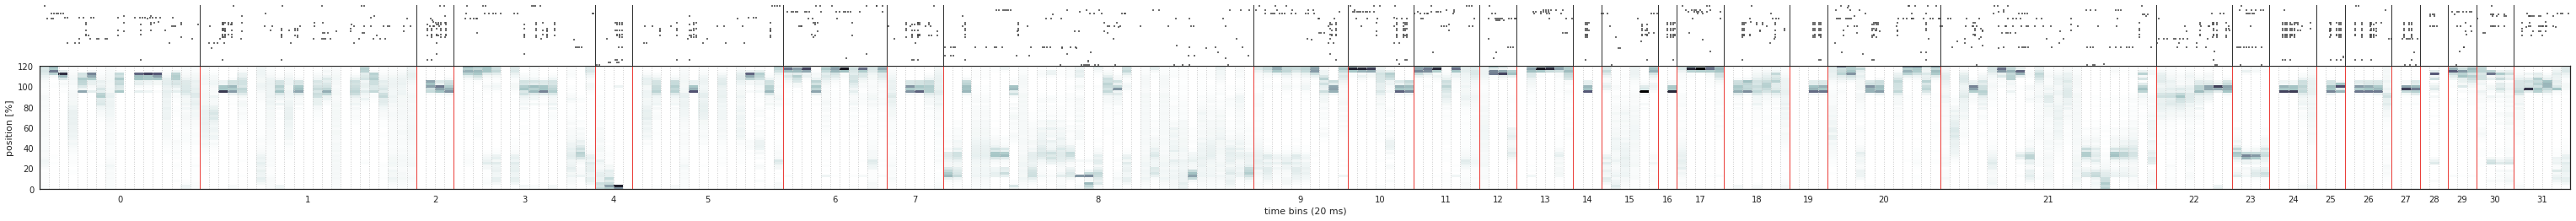

In [227]:
idx = np.where((np.array(p_time_swap) < 0.05) & (np.array(p_col_cycle) < 0.05))[0]
fig = plot_all_PBEs(bst_placecells[idx], sta_placecells, tc_placecells, tc_placecells)

fig.savefig(r'C:\Users\ryanh\OneDrive\Desktop\replay.svg',dpi=300)

In [229]:
# decode neural activity
posterior, bdries, mode_pth, mean_pth = nel.decoding.decode1D(bst=bst_placecells, ratemap=tc_placecells, xmax=120)

In [308]:
posterior, cum_posterior_lengths, mode_pth, mean_pth =  nel.decoding.decode1D(bst=bst_placecells[22], ratemap=tc_placecells, xmin=0, xmax=120)

slopes, intercepts, r2values = replay.linregress_bst(bst_placecells[22], tc_placecells)

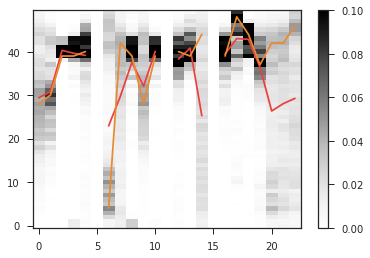

In [309]:

plt.imshow(posterior,origin='lower',aspect='auto',vmin=0,vmax=.1)
plt.colorbar()
x = np.hstack([mean_pth,0,120])
x = ((x - min(x)) / (max(x) - min(x))) * (50-0) + 0
plt.plot(x[:-2])

x = np.hstack([mode_pth,0,120])
x = ((x - min(x)) / (max(x) - min(x))) * (50-0) + 0
plt.plot(x[:-2])

In [287]:
posterior


array([[1.58012639e-04, 5.50373962e-07, 6.53027402e-08, ...,
        7.01415387e-03, 8.28563029e-03, 6.95835617e-03],
       [3.85224255e-04, 5.38696142e-06, 1.84634226e-07, ...,
        6.25100501e-03, 6.97291371e-03, 5.73282185e-03],
       [1.17001853e-03, 3.36589425e-05, 1.87242139e-11, ...,
        1.34631003e-02, 1.02279415e-02, 6.95677009e-03],
       ...,
       [1.15963893e-02, 3.45676780e-03, 2.36670797e-09, ...,
        9.99402101e-03, 1.27820597e-02, 3.75185430e-02],
       [8.58302777e-03, 1.34881173e-03, 1.17814951e-09, ...,
        7.16490931e-03, 8.33336638e-03, 2.68491508e-02],
       [8.57441177e-03, 2.03280964e-03, 5.85230914e-09, ...,
        5.62637588e-03, 6.11161845e-03, 2.95937638e-02]])

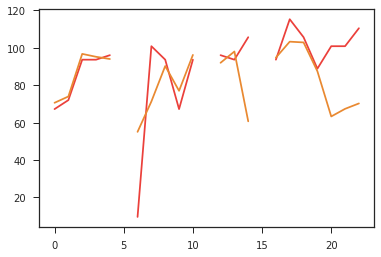

In [267]:
plt.plot(mode_pth)
plt.plot(mean_pth)

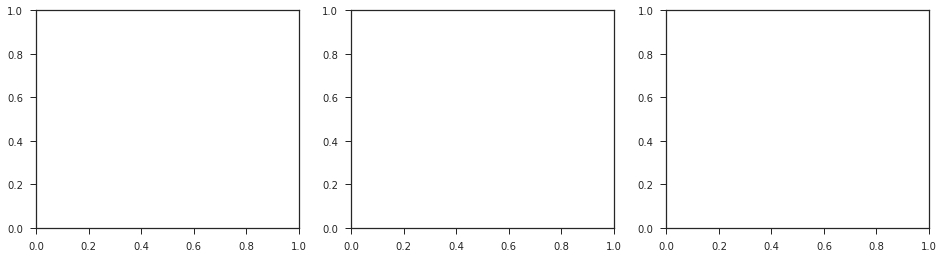

In [269]:

fig, axes = plt.subplots(ncols=3, figsize=(16,4))

ax0, ax1, ax2 = axes

# plot trajectory in gray
for ax in axes:
    npl.plot2d(pos, lw=0.5, c='0.8', ax=ax)
    ax.set_aspect('equal')  
    ax.set_xlabel('x position')
    ax.set_ylabel('y position')
    npl.utils.clear_right(ax)
    npl.utils.clear_top(ax)

In [3]:
(81000000/30000)/60

# 81000000/0.01

8100000000.0